In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.compose import ColumnTransformer, make_column_transformer
from sklearn.dummy import DummyClassifier
from sklearn.impute import SimpleImputer
from sklearn.model_selection import cross_val_score, cross_validate, train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler, OrdinalEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
import warnings
warnings.filterwarnings('ignore')
from sklearn.svm import SVC, SVR
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import callbacks
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D


## Importing the Data

In [2]:
train_df = pd.read_csv("train.csv")
train_df.shape

(42000, 785)

In [3]:
train_df

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41996,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41997,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41998,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
display(train_df.info())
display(train_df.describe(include="all"))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42000 entries, 0 to 41999
Columns: 785 entries, label to pixel783
dtypes: int64(785)
memory usage: 251.5 MB


None

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
count,42000.000000,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,...,42000.000000,42000.000000,42000.000000,42000.00000,42000.000000,42000.000000,42000.0,42000.0,42000.0,42000.0
mean,4.456643,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.219286,0.117095,0.059024,0.02019,0.017238,0.002857,0.0,0.0,0.0,0.0
std,2.887730,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6.312890,4.633819,3.274488,1.75987,1.894498,0.414264,0.0,0.0,0.0,0.0
min,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
25%,2.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
50%,4.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
75%,7.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
max,9.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,254.000000,254.000000,253.000000,253.00000,254.000000,62.000000,0.0,0.0,0.0,0.0


In [5]:
train_df["pixel774"].unique()

array([  0, 194, 213, 253,  98,  61, 252, 191,  27,   6, 157, 135,  28,
       108,  49,  20,  38, 226, 128,  41,  60,  18,  95,  82,  63,  43,
         3, 218, 105,  75,  36, 192, 212, 254, 183, 117,  99,  89, 204,
       125,  17, 247, 190, 151,  44, 111,  97, 234, 249,  84,  19, 129,
        80, 122,  79, 223,  30], dtype=int64)

## Dummy Classifier

In [6]:
dummy_clf = DummyClassifier(strategy="most_frequent")

In [7]:
X = train_df.drop(columns=["label"])
y = train_df["label"]
dummy_clf.fit(X,y)
print("The accuracy of the model on the training data: %0.3f" %
      (dummy_clf.score(X, y)))

The accuracy of the model on the training data: 0.112


In [8]:
dummy_clf.predict(X)

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

## KNN Classifier

In [9]:

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.20,random_state=123)
knn = KNeighborsClassifier()
lr = LogisticRegression(max_iter=1000)
knn.fit(X_train,y_train)
lr.fit(X_train,y_train)
knn.predict(X_test)
lr.predict(X_test)
print(knn.score(X_test,y_test))
print(lr.score(X_test,y_test))


'\nX_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.20,random_state=123)\nknn = KNeighborsClassifier()\nlr = LogisticRegression(max_iter=1000)\nknn.fit(X_train,y_train)\nlr.fit(X_train,y_train)\nknn.predict(X_test)\nlr.predict(X_test)\nprint(knn.score(X_test,y_test))\nprint(lr.score(X_test,y_test))\n'

In [10]:
'''
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import callbacks

X_train, X_valid, y_train, y_valid = train_test_split(X, y,test_size=0.20,random_state=123)
input_shape = [X_train.shape[1]]
print("Input shape: {}".format(input_shape))

early_stopping = callbacks.EarlyStopping(
    min_delta=0.001, # minimium amount of change to count as an improvement
    patience=20, # how many epochs to wait before stopping
    restore_best_weights=True,
)

model = keras.Sequential([
    layers.Dense(1024, activation='relu', input_shape=input_shape),
    layers.Dense(256, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax'),
])
model.compile(
    optimizer='adam',
    loss='mae',
    metrics=['accuracy'],
)
history = model.fit(
    X_train, y_train,
    validation_data=(X_valid, y_valid),
    batch_size=128,
    epochs=10,
    #callbacks=[early_stopping],
)
history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss']].plot()
history_df.loc[5:, ['loss']].plot();
print("Minimum Validation Loss: {:0.4f}".format(history_df['val_loss'].min()));
'''


'\nimport tensorflow as tf\nimport matplotlib.pyplot as plt\nfrom tensorflow import keras\nfrom tensorflow.keras import layers\nfrom tensorflow.keras import callbacks\n\nX_train, X_valid, y_train, y_valid = train_test_split(X, y,test_size=0.20,random_state=123)\ninput_shape = [X_train.shape[1]]\nprint("Input shape: {}".format(input_shape))\n\nearly_stopping = callbacks.EarlyStopping(\n    min_delta=0.001, # minimium amount of change to count as an improvement\n    patience=20, # how many epochs to wait before stopping\n    restore_best_weights=True,\n)\n\nmodel = keras.Sequential([\n    layers.Dense(1024, activation=\'relu\', input_shape=input_shape),\n    layers.Dense(256, activation=\'relu\'),\n    layers.Dense(64, activation=\'relu\'),\n    layers.Dense(10, activation=\'softmax\'),\n])\nmodel.compile(\n    optimizer=\'adam\',\n    loss=\'mae\',\n    metrics=[\'accuracy\'],\n)\nhistory = model.fit(\n    X_train, y_train,\n    validation_data=(X_valid, y_valid),\n    batch_size=128,\n

In [11]:
'''
score, acc = model.evaluate(X_train, y_train,
                            batch_size=128)
print('Test score:', score)
print('Test accuracy:', acc)
'''

"\nscore, acc = model.evaluate(X_train, y_train,\n                            batch_size=128)\nprint('Test score:', score)\nprint('Test accuracy:', acc)\n"

## CNN Classifier

In [8]:
# Split then normalize the data
X_train, X_valid, y_train, y_valid = train_test_split(X, y,test_size=0.20,random_state=123)
X_train = X_train/255
X_valid = X_valid/255

# Reshape the data back into image shape (2D matrix)
X_train = X_train.values.reshape(X_train.shape[0], 28, 28, 1)
X_valid = X_valid.values.reshape(X_valid.shape[0], 28, 28, 1)
input_shape = (28, 28, 1)
y_train = keras.utils.to_categorical(y_train, 10)
y_valid = keras.utils.to_categorical(y_valid, 10)
print("Input shape: {}".format(input_shape))
X_train = X_train.astype('float32')
X_valid = X_valid.astype('float32')

# Set up early stopping to limit overfitting and decrease training time
early_stopping = callbacks.EarlyStopping(
    min_delta=0.001, # minimium amount of change to count as an improvement
    patience=10, # how many epochs to wait before stopping
    restore_best_weights=True,
)


model = keras.Sequential([
    layers.Conv2D(filters=32, kernel_size=5,activation='relu',input_shape=input_shape),
    layers.MaxPool2D(pool_size=2),
    layers.Conv2D(filters=64, kernel_size=3, activation='relu',input_shape=input_shape),
    layers.MaxPool2D(pool_size=2),
    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.25),
    layers.Dense(10, activation='softmax'),
])
model.compile(
    optimizer=tf.keras.optimizers.Adam(epsilon=0.01),
    loss='mae',
    metrics=['accuracy'],
)
history = model.fit(
    X_train, y_train,
    validation_data=(X_valid, y_valid),
    batch_size=128,
    epochs=30,
    #callbacks=[early_stopping],
)


Input shape: (28, 28, 1)
Epoch 1/30
263/263 [==============================] - 16s 56ms/step - loss: 0.1799 - accuracy: 0.1060 - val_loss: 0.1796 - val_accuracy: 0.1217
Epoch 2/30
263/263 [==============================] - 15s 56ms/step - loss: 0.1795 - accuracy: 0.1278 - val_loss: 0.1790 - val_accuracy: 0.1456
Epoch 3/30
263/263 [==============================] - 15s 58ms/step - loss: 0.1788 - accuracy: 0.1580 - val_loss: 0.1778 - val_accuracy: 0.1626
Epoch 4/30
263/263 [==============================] - 19s 71ms/step - loss: 0.1767 - accuracy: 0.1869 - val_loss: 0.1733 - val_accuracy: 0.1363
Epoch 5/30
263/263 [==============================] - 18s 67ms/step - loss: 0.1596 - accuracy: 0.2985 - val_loss: 0.1226 - val_accuracy: 0.4604
Epoch 6/30
263/263 [==============================] - 19s 71ms/step - loss: 0.1121 - accuracy: 0.4857 - val_loss: 0.0821 - val_accuracy: 0.6354
Epoch 7/30
263/263 [==============================] - 19s 72ms/step - loss: 0.0758 - accuracy: 0.6666 - val_los

Minimum Validation Loss: 0.0067


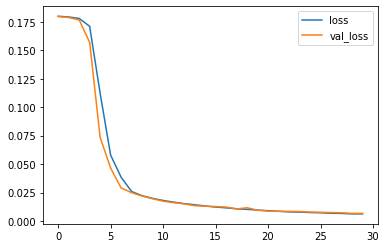

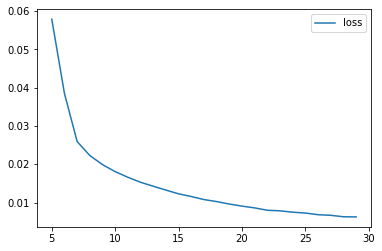

In [15]:
history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss']].plot()
history_df.loc[5:, ['loss']].plot();
print("Minimum Validation Loss: {:0.4f}".format(history_df['val_loss'].min()));
#history_frame.loc[:, ['accuracy', 'val_accuracy']].plot();


## SVC - C Support Vector Classification

In [ ]:
#SVC

#X = train_df.drop(columns=["label"])
#y = train_df["label"]
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.20,random_state=123)


linear_svc = SVC(kernel="linear", verbose=True, gamma='auto')

linear_svc.fit(X_train, y_train)

linear_svc.predict(X_test)

print("SVC: ",linear_svc.score(X_test,y_test))

[LibSVM]